In [1]:
import pandas as pd

# Load all CSV files provided by the user
game_schedule = pd.read_csv("game_schedule.csv")
period_stats = pd.read_csv("period_stats.csv")
player_stats = pd.read_csv("player_stats.csv")
team_stats = pd.read_csv("team_stats.csv")

c:\Users\abhis\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
# Display the first few rows of each file to confirm successful loading
game_schedule.head()
period_stats.head()
team_stats.head()

,Statistic,SU,OPP
0,Goals-Shot attempts,119-241,48-123
1,Goals scored per game,17,6.86
2,Shot pct.,0.494,0.39
3,Shots on goal-Attempts,185-241,88-123
4,SOG pct.,0.768,0.715


# Q1: How many games did SU play?

In [6]:
total_games = len(game_schedule)
q1_result = f"Total games played: {total_games}"
q1_result

'Total games played: 7'

# Q2: How many games were wins vs losses?

In [8]:
wins = len(game_schedule[game_schedule["Result"].str.startswith("W")])
losses = total_games - wins
q2_result = f"Wins: {wins}, Losses: {losses}"
q2_result

'Wins: 6, Losses: 1'

# Q3: Top 5 players by goals

In [10]:
top_goals = player_stats.sort_values("G", ascending=False)[["PLAYER", "G"]].head(5)
top_goals

,PLAYER,G
0,Emily Hawryschuk,35
1,Megan Carney,18
2,Meaghan Tyrrell,15
4,Sierra Cockerille,11
3,Sam Swart,10


# Q4: Top 5 players by draw controls

In [11]:
top_draw_controls = player_stats.sort_values("DC", ascending=False)[["PLAYER", "DC"]].head(5)
top_draw_controls

,PLAYER,DC
0,Emily Hawryschuk,16
14,Ella Simkins,12
24,Sarah Cooper,5
7,Bianca Chevarie,4
21,Hallie Simkins,3


# Q5: Average attendance by game location

In [12]:
def classify_location(opponent):
    if str(opponent).startswith("at"):
        return "Away"
    elif "vs" in str(opponent):
        return "Neutral"
    else:
        return "Home"

game_schedule["Location"] = game_schedule["Opponent"].apply(classify_location)
attendance_avg = game_schedule.groupby("Location")["Att."].mean()
attendance_avg

Location
Away    455.0
Home    491.6
Name: Att., dtype: float64

# Q6: Does Syracuse score more in the 1st or 2nd half?

In [18]:
goals_by_period = period_stats[period_stats["Category"] == "Goals by Period"]
su_goals_first = goals_by_period.loc[goals_by_period["Team"] == "Syracuse", "1st"].values[0]
su_goals_second = goals_by_period.loc[goals_by_period["Team"] == "Syracuse", "2nd"].values[0]
goals_by_period



,Category,Team,1st,2nd,Total
0,Goals by Period,Syracuse,68,51,119
1,Goals by Period,Opponents,21,27,48


# Q7: Which players contribute significantly to both offense and defense?

In [20]:
player_stats["Offense"] = player_stats["G"] + player_stats["A"]
player_stats["Defense"] = player_stats["GB"] + player_stats["DC"] + player_stats["CT"]
top_balanced = player_stats.sort_values(by=["Offense", "Defense"], ascending=False)[["PLAYER", "Offense", "Defense"]].head(5)
top_balanced

,PLAYER,Offense,Defense
0,Emily Hawryschuk,39,34
1,Megan Carney,29,7
2,Meaghan Tyrrell,23,12
3,Sam Swart,18,6
4,Sierra Cockerille,15,2


# Q8: What percentage of total team goals were scored by the top 5 scorers?

In [21]:
top5_goals = player_stats.sort_values("G", ascending=False).head(5)["G"].sum()
total_goals_team = int(team_stats.loc[team_stats["Statistic"] == "Total Goals", "SU"].values[0])
percent_goals_by_top5 = round((top5_goals / total_goals_team) * 100, 2)
percent_goals_by_top5

74.79

# Q9: Which players are the most efficient (high points, low turnovers)?

In [22]:
player_stats["Pts_TO_Ratio"] = player_stats["Pts"] / player_stats["TO"].replace(0, 1)
top_efficiency = player_stats.sort_values("Pts_TO_Ratio", ascending=False)[["PLAYER", "Pts", "TO", "Pts_TO_Ratio"]].head(5)
top_efficiency

,PLAYER,Pts,TO,Pts_TO_Ratio
4,Sierra Cockerille,15,2,7.500000
9,Emma Tyrrell,5,1,5.000000
1,Megan Carney,29,7,4.142857
11,Cara Quimby,4,1,4.000000
2,Meaghan Tyrrell,23,6,3.833333


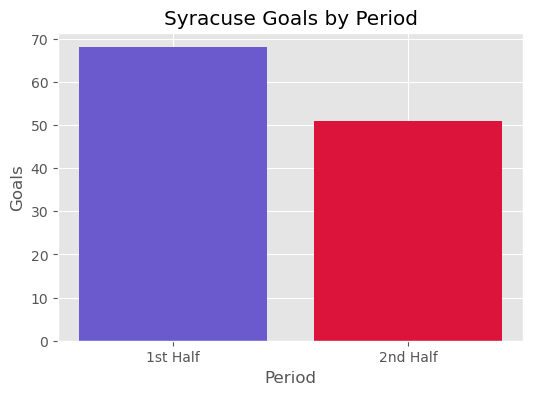

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use("ggplot")

# Bar chart: SU goals in 1st vs 2nd half
plt.figure(figsize=(6, 4))
plt.bar(["1st Half", "2nd Half"], [su_goals_first, su_goals_second], color=["#6A5ACD", "#DC143C"])
plt.title("Syracuse Goals by Period")
plt.ylabel("Goals")
plt.xlabel("Period")
plt.show()


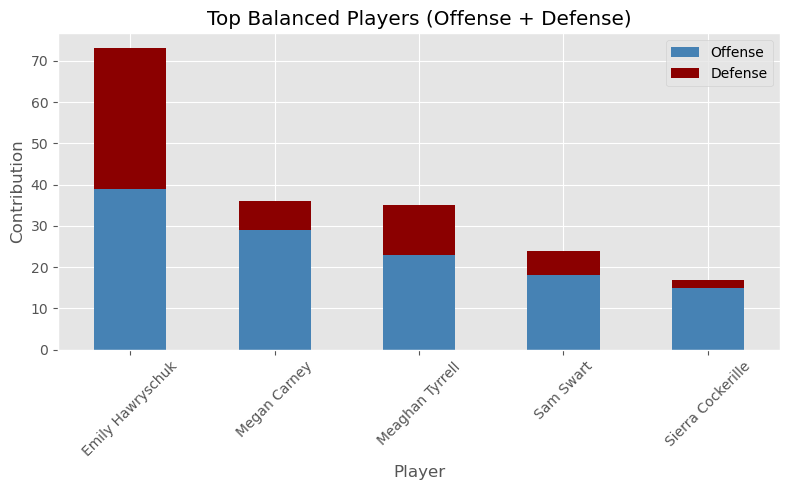

In [27]:
# Stacked bar chart for top 5 balanced players
top_balanced.set_index("PLAYER")[["Offense", "Defense"]].plot(
    kind="bar", stacked=True, figsize=(8, 5), color=["#4682B4", "#8B0000"]
)
plt.title("Top Balanced Players (Offense + Defense)")
plt.ylabel("Contribution")
plt.xlabel("Player")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


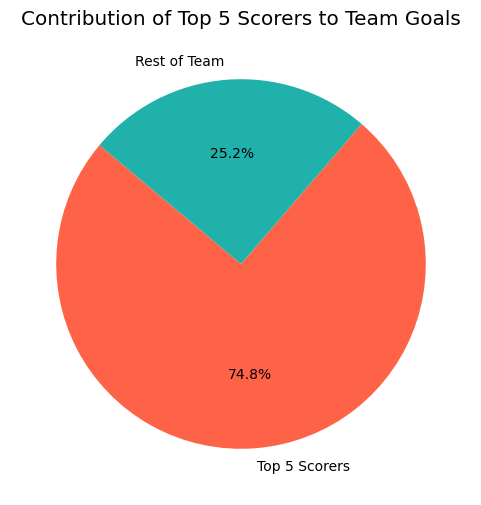

In [28]:
# Pie chart: goals scored by top 5 vs rest of team
labels = ["Top 5 Scorers", "Rest of Team"]
sizes = [percent_goals_by_top5, 100 - percent_goals_by_top5]
colors = ["#FF6347", "#20B2AA"]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=colors)
plt.title("Contribution of Top 5 Scorers to Team Goals")
plt.show()


C:\Users\abhis\AppData\Local\Temp\ipykernel_20432\2460867947.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_efficiency, x="PLAYER", y="Pts_TO_Ratio", palette="viridis")


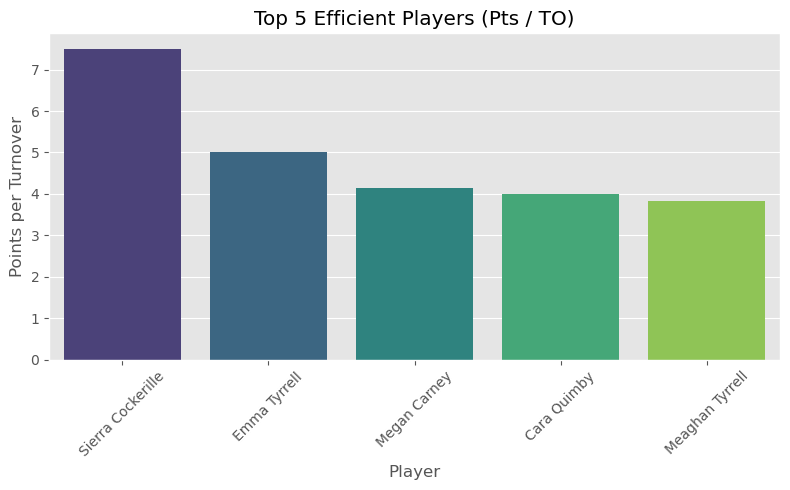

In [29]:
# Bar chart: Pts-to-Turnover ratio
plt.figure(figsize=(8, 5))
sns.barplot(data=top_efficiency, x="PLAYER", y="Pts_TO_Ratio", palette="viridis")
plt.title("Top 5 Efficient Players (Pts / TO)")
plt.ylabel("Points per Turnover")
plt.xlabel("Player")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
